In [12]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

      ┌───┐ ░ ┌───┐               ┌───┐ ░                 ░                »
 q_0: ┤ H ├─░─┤ X ├──■─────────■──┤ X ├─░───■─────────────░────────■───────»
      ├───┤ ░ ├───┤  │         │  ├───┤ ░   │             ░        │       »
 q_1: ┤ H ├─░─┤ X ├──■─────────■──┤ X ├─░───┼────■────────░────────■───────»
      ├───┤ ░ └───┘  │         │  └───┘ ░   │    │        ░      ┌─┴─┐     »
 q_2: ┤ H ├─░────────┼────■────┼────────░───┼────┼────■───░───X──┤ X ├─────»
      └───┘ ░        │    │    │        ░   │    │    │   ░   │  └───┘     »
 q_3: ──────░────────┼────┼────┼────────░───┼────┼────┼───░───X─────────■──»
            ░        │  ┌─┴─┐  │        ░   │    │    │   ░   ░    ░  ┌─┴─┐»
 q_4: ──────░────────┼──┤ X ├──┼────────░───┼────┼────┼───░───░────░──┤ X ├»
            ░        │  └─┬─┘  │        ░   │    │    │   ░   ░    ░  └───┘»
 q_5: ──────░────────┼────┼────┼────────░───┼────┼────┼───░────────────────»
            ░        │    │    │        ░ ┌─┴─┐  │    │   ░                »

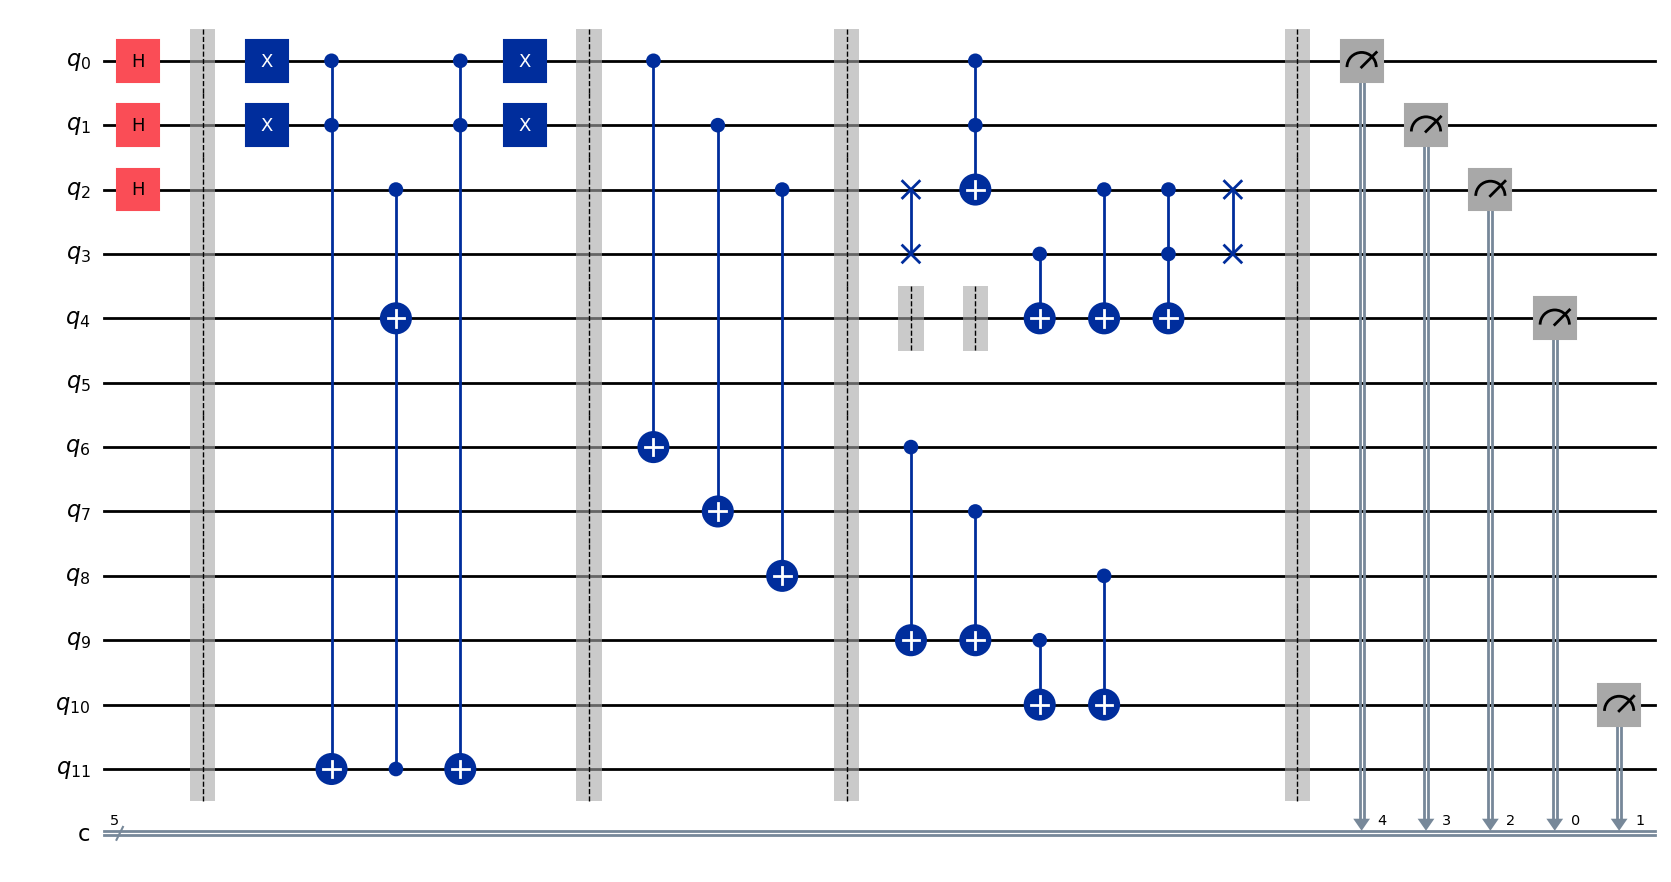

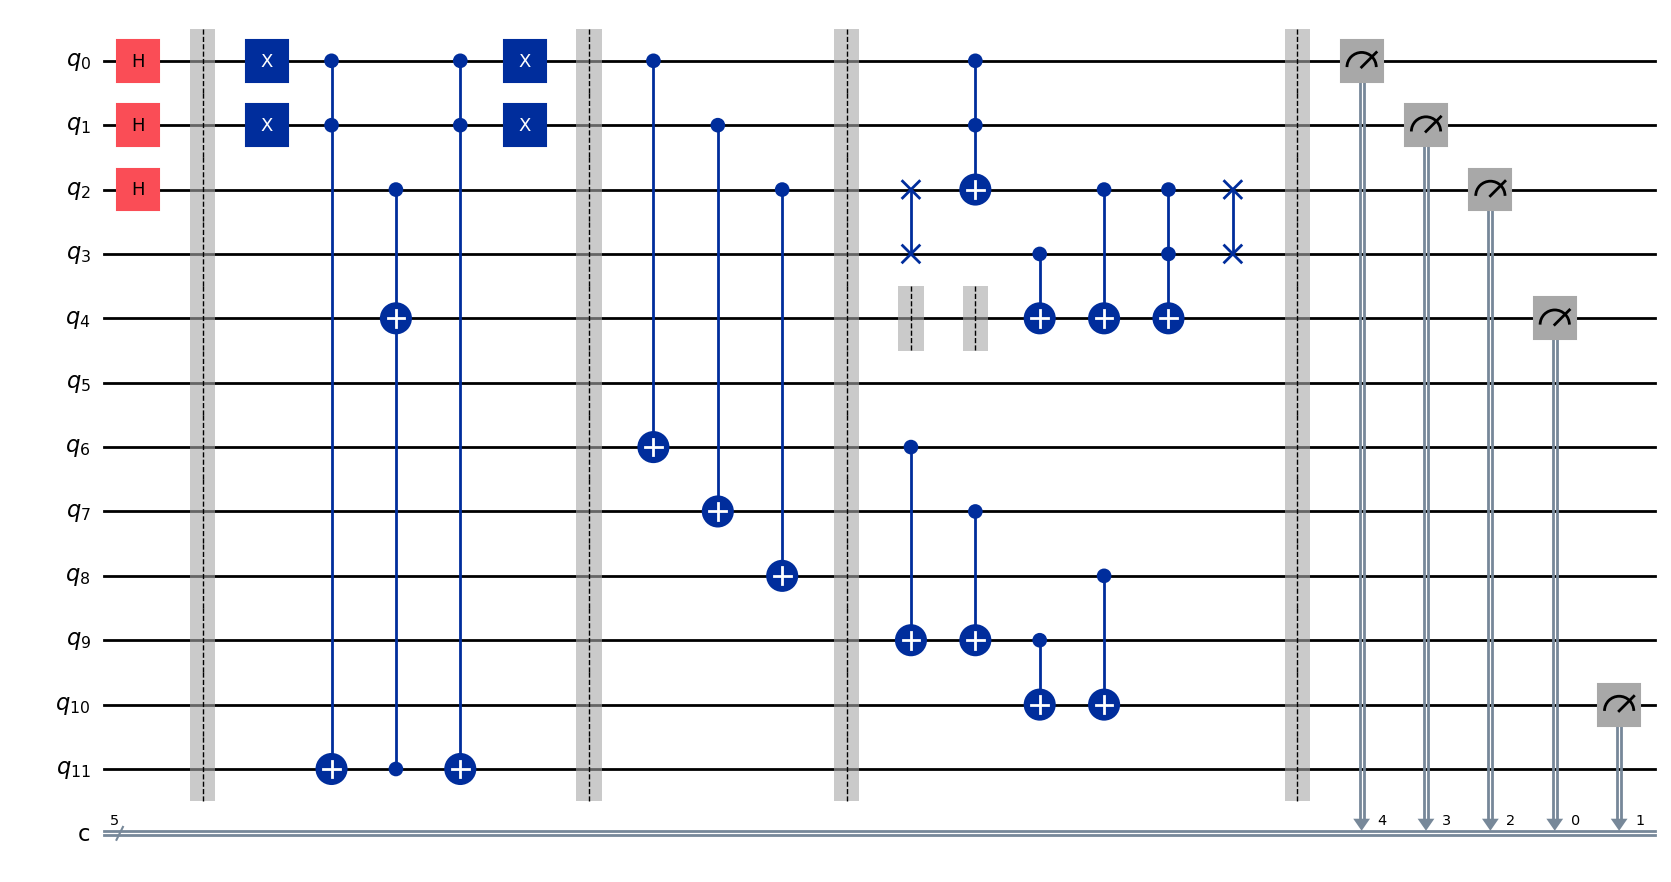

In [13]:
circuit = QuantumCircuit(12, 5)
circuit.h(0) # initalize input A
circuit.h(1) # initalize input B
circuit.h(2) # initalize input C
circuit.barrier() # For separation
circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,11)
circuit.ccx(2,11,4)
circuit.ccx(0,1,11)
circuit.x(0)
circuit.x(1)
circuit.barrier() # For separation
circuit.cx(0,6)# Entangling qbit 0 to 6
circuit.cx(1,7)# Entangling qbit 1 to 7
circuit.cx(2,8)# Entangling qbit 2 to 8
circuit.barrier()# For separation

circuit.swap(3, 2) # Swaping qbit 3 and 2 for the next operation
circuit.ccx(0,1,2)# AND gate on qbit 0 and 1, result in qbit 2
circuit.barrier(4)# For separation
circuit.barrier(4)# For separation
circuit.cx(3,4)# First part of OR gate between qbit 2 and 3 reslut in qbit 4
circuit.cx(2,4)# Second part of OR gate between qbit 2 and 3 result in qbit 4
circuit.ccx(2,3,4)# Final part of OR gate between qbit 2 and 3 result in qbit 4
circuit.swap(3, 2)# swaping qbit 3 and 2 back to original state

circuit.cx(6,9)#First part of XOR gate between qbit 6 and 7 result in qbit 9
circuit.cx(7,9)#Final part of XOR gate between qbit 6 and 7 result in qbit 9
circuit.cx(9,10)#First part of XOR gate between qbit 9 and 8 result in qbit 10
circuit.cx(8,10)#Final part of XOR gate between qbit 9 and 8 result in qbit 10


circuit.barrier()# For separation
circuit.measure(0, 4)
circuit.measure(1, 3) 
circuit.measure(2, 2) 
circuit.measure(4, 0)
circuit.measure(10,1)
print(circuit)
circuit.draw(output='mpl')

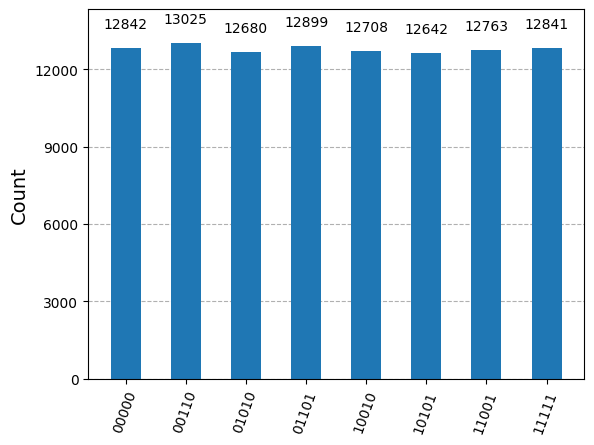

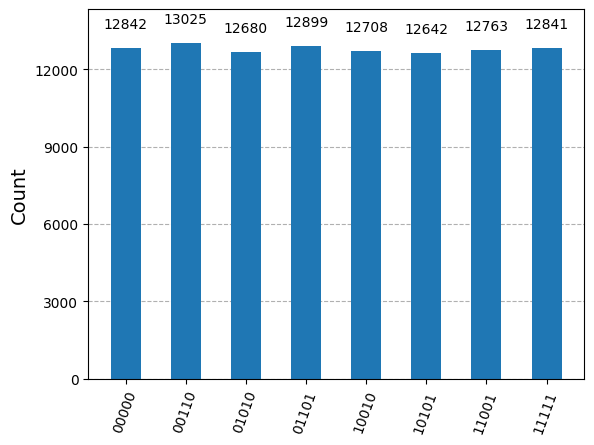

In [14]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=102400).result()
plot_histogram(result.get_counts())